# profit estimation of companies with linear regression

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### loading the dataset

In [3]:
companies = pd.read_csv(r'C:\dataset\1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### extracting independent and dependent variables

In [4]:
X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

### visualizing the data before processing

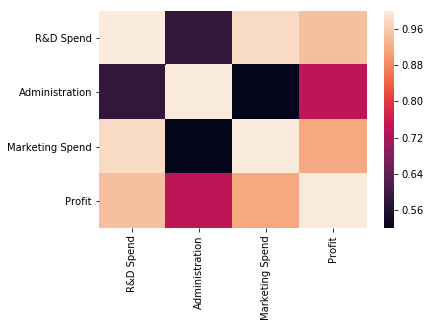

In [5]:
sns.heatmap(companies.corr())


### encoding categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


### avoiding dummy data trap

In [13]:
X = X[:,1:]

### splitting dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


### fitting model to training set

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### predicting the test dataset

In [18]:
y_pred = lin_reg.predict(X_test)


### finding coefficients and intercepts

In [19]:
# coefficient 
print(lin_reg.coef_)

[-1.53439008e+03 -4.14004825e+04  4.14004825e+04 ...  4.34055575e+02
  2.12774346e+00  2.51563610e-01]


In [20]:
# intercepts
print(lin_reg.intercept_)

-119326.05126444151


### evaluating the model

In [21]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9004060415079007